# wrangle_act
##   Gathering Data
###        Importin libraries

In [1]:
import numpy as np
import pandas as pd
import re
import csv
import zipfile
import requests
import io
import re
import tweepy
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import os
import os.path
import seaborn as sb
import datetime
import warnings
from timeit import default_timer as timer
%matplotlib inline
warnings.filterwarnings("ignore", message="SettingWithCopyWarning")
pd.set_option('mode.chained_assignment', None)

### WeRateDogs Twitter archive is already in the work directory named  *twitter_archive_enhanced.csv*

### downloading tweet image predictions file

In [2]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name_ip=url.split('/')[-1].replace('-','_')
response = requests.get(url)
if response.status_code != 200:
    print('Download Failed')
if not os.path.isfile(file_name_ip):
    with open(file_name_ip, mode='wb') as fl:
        fl.write(response.content)
else:
    print('File exists')

File exists


### query the Twitter API for each tweet's JSON data

*** <span style="color:red">the following code cell isn't functional. it is a showcase,  the working code is in the code cell after that</span> ***

In [3]:
## Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
## These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'
#
#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)
#
#api = tweepy.API(auth, wait_on_rate_limit=True)
## NOTE TO REVIEWER: this student had mobile verification issues so the following
## Twitter API code was sent to this student from a Udacity instructor
#
## Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)
## Query Twitter's API for JSON data for each tweet ID in the Twitter archive
#count = 0
#fails_dict = {}
#start = timer()
## Save each tweet's returned JSON as a new line in a .txt file
#with open('tweet_json.txt', 'w') as outfile:
#    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#    for tweet_id in tweet_ids:
#        count += 1
#        print(str(count) + ": " + str(tweet_id))
#        try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#            print("Success")
#            json.dump(tweet._json, outfile)
#            outfile.write('\n')
#        except tweepy.TweepError as e:
#            print("Fail")
#            fails_dict[tweet_id] = e
#            pass
#end = timer()
#print(end - start)
#print(fails_dict)

the alternatiive workin code

In [4]:
url="https://video.udacity-data.com/topher/2018/November/5bf60fc9_tweet-json/tweet-json.zip"
response = requests.get(url)
name = url.split('/')[-1]

zip_file = zipfile.ZipFile(io.BytesIO(response.content))
zip_file.extractall()
cur_dir = os.getcwd()
file_list = os.listdir(cur_dir)

for i in range(0,int(len(file_list)/2 + 1),1):
    for f in file_list:
        
        if name[:5] not in f:
            
            file_list.remove(f)
            
d_name=file_list[0]
file_name = name.replace('-','_').replace('zip','txt')
if not os.path.isfile(file_name):
    os.rename(d_name,file_name) 
else:
    print('File exists')


File exists


### Loading the previously gathered data

loading twitter_archive

In [5]:
twitter_archive_df = pd.read_csv('twitter_archive_enhanced.csv')

loading image_predictions

In [6]:
image_predictions_df = pd.read_csv(file_name_ip, sep='\t')

loading tweet_json

In [7]:
list_t1=[]
with open('tweet_json.txt') as myFile: 
    for line in myFile:
        res_dict = json.loads(line) 
        tweet_id = res_dict['id']
        retweet_count = res_dict['retweet_count']
        favorite_count = res_dict['favorite_count']
        list_t1.append({'tweet_id':tweet_id,'retweet_count':retweet_count,'favorite_count':favorite_count})
api_df = pd.DataFrame(list_t1)


## Assessing Data

### programmaic assessment

In [8]:
twitter_archive_df.info()
print("\n")
image_predictions_df.info()
print("\n")
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive_df['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [10]:
twitter_archive_df['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [11]:
twitter_archive_df['rating_numerator'].describe()

count    2356.000000
mean       13.126486
std        45.876648
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

### visual assessment

In [12]:
twitter_archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [13]:
image_predictions_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [14]:
api_df

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [15]:
pd.set_option('display.max_colwidth', 1000)
print(twitter_archive_df['expanded_urls'][15:25])

15                                                                                                                                                                                                    https://twitter.com/dog_rates/status/889278841981685760/video/1
16                                                                                                                                                                                                    https://twitter.com/dog_rates/status/888917238123831296/photo/1
17                                                                                                                                    https://twitter.com/dog_rates/status/888804989199671297/photo/1,https://twitter.com/dog_rates/status/888804989199671297/photo/1
18    https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.com/dog_rates/status/888554962724278272/photo/1,https://twitter.

In [16]:
s1=list(twitter_archive_df['text'][516:517])
s2=list(twitter_archive_df['rating_numerator'][516:517])
s3=list(twitter_archive_df['rating_denominator'][516:517])
print(s1,'\n',s2,'\n',s3)

['Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'] 
 [24] 
 [7]


In [17]:
twitter_archive_df['name'].value_counts()
res1 = (twitter_archive_df['name'].values == 'a').sum()
res2 = (twitter_archive_df['name'].values == 'one').sum()

print(res1,res2)

55 4


In [18]:
s3=list(twitter_archive_df['name'][820:821])
s4=list(twitter_archive_df['text'][820:821])
print(s3,'\n',s4)

['Al'] 
 ["Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV"]


In [19]:
s5=list(twitter_archive_df['name'][852:853])
s6=list(twitter_archive_df['text'][852:853])
print(s5,'\n',s6)

['my'] 
 ["This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB"]


### observations

#### quality
- _<span style="color:green">total numberr of rows is different for each of the three tables 2356, 2075 & 2354 | either missing data or have no picures</span>_
- _<span style="color:gray">expanded_urls in tweeter archive has missing 59 values</span>_
- _<span style="color:green">181 entries are retweets</span>_
- _<span style="color:green">data types for doggo,floofer,pupper and puppo are not bool but object </span>_
- _<span style="color:blue">doggo,floofer,pupper and puppo have none not a Null</span>_
- _<span style="color:green">data types for tweet_id, status_user_id & status_id are in and float</span>_
- _<span style="color:green">some enttries like enttry 17 have their expanded_urls values repeated in the cell</span>_
- _<span style="color:gray">rating_denominator has a value of 0 once</span>_
- _<span style="color:blue">1776 is much higher than 59.003134 so its an outlier</span>_
- _<span style="color:green">timestamp has type object</span>_
- _<span style="color:green">in_reply has a lot of missing values and its not a required data</span>
- _<span style="color:green">entry 517 does not have a rating in text but one is presen in the data</span>
- _<span style="color:green">"a" and "one" are not names they appear muliple times as names</span>_
- _<span style="color:green">entries 821 and 853 has "Al Cabone" recorded wrongly as "AL" and "zoey" as "my"</span>_


#### tidiness
- _<span style="color:green">doggo,floofer,pupper and puppo are multiple columns for dog type</span>_
- _<span style="color:blue">source only has four repeated values</span>_
- _<span style="color:blue">expanded_url can have multiple values</span>_
- _<span style="color:green">tweet data is stored in 2 tables</span>_
- _<span style="color:green">retweeted_status will nor be required if retweets are deleted</span>_
- _<span style="color:green">column names for the image prediction table are not discribtive</span>_

## Cleaning

copyin dfs

In [20]:
archive_copy_df=twitter_archive_df.copy()
api_copy_df=api_df.copy()
predictions_copy_df=image_predictions_df.copy()

### Definition 
    marked by number:tybe 
### Code
    is in code cells
### Test
    will be called after eery code cell


***1:Q*** - missing data? to address the different number of rows dataframes we will drop the entries that are unique to only one table ie tweets without pic or json data

In [21]:
def pair_columns(df, col1, col2):
       return df[col1] + df[col2]

def paired_mask(df1, df2, col1, col2):
       return pair_columns(df1, col1, col2).isin(pair_columns(df2, col1, col2))

predictions_copy_df = predictions_copy_df.loc[paired_mask(predictions_copy_df, archive_copy_df, "tweet_id", "tweet_id")]
api_copy_df = api_copy_df.loc[paired_mask(api_copy_df, archive_copy_df, "tweet_id", "tweet_id")]


archive_copy_df = archive_copy_df.loc[paired_mask(archive_copy_df, api_copy_df, "tweet_id", "tweet_id")]
predictions_copy_df = predictions_copy_df.loc[paired_mask(predictions_copy_df, api_copy_df, "tweet_id", "tweet_id")]
api_copy_df = api_copy_df.loc[paired_mask(api_copy_df, predictions_copy_df, "tweet_id", "tweet_id")]
archive_copy_df = archive_copy_df.loc[paired_mask(archive_copy_df, predictions_copy_df, "tweet_id", "tweet_id")]



api_copy_df.info()
print("\n")
archive_copy_df.info()
print("\n")
predictions_copy_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2073 non-null   int64
 1   retweet_count   2073 non-null   int64
 2   favorite_count  2073 non-null   int64
dtypes: int64(3)
memory usage: 64.8 KB


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2073 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2073 non-null   object 
 4   source                      2073 non-null   object 
 5   text                        2073 non-null   object 
 6   retweeted_status_id         79 non-null     float64
 7   retweeted_sta

***2:Q*** - missing data? expanded_urls in tweeter archive has missing 59 values that cant be found or completed

In [22]:
## those entries already didn't appear after re assessment it seems they didn't hae any pictures in them

***3:Q*** - 181 entries are retweets that need to be removed from all tables (79 after reassessment) 

In [23]:
archive_copy_df = archive_copy_df[archive_copy_df['retweeted_status_id'].isnull()]
archive_copy_df.info()
print("\n")
predictions_copy_df = predictions_copy_df.loc[paired_mask(predictions_copy_df, archive_copy_df, "tweet_id", "tweet_id")]
api_copy_df = api_copy_df.loc[paired_mask(api_copy_df, archive_copy_df, "tweet_id", "tweet_id")]
api_copy_df.info()
print("\n")
predictions_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

***1:T*** - tweet data is stored in 2 tables requires merging boh tables

In [24]:
master_tweet_ini_df = pd.merge(archive_copy_df, api_copy_df,on=['tweet_id'], how='left')
master_tweet_ini_df.info()
master_tweet_ini_df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    1994 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   1994 non-null   object 
 4   source                      1994 non-null   object 
 5   text                        1994 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               1994 non-null   object 
 10  rating_numerator            1994 non-null   int64  
 11  rating_denominator          1994 non-null   int64  
 12  name                        1994 non-null   object 
 13  doggo                       1994 

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None,9774,41048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None,41,111
1990,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None,147,311
1991,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None,47,128
1992,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None,48,132


***2:T*** - retweeted_status will nor be required after the retweets have been deleted and from the reassessment all their values are null
    so they will be removed

In [25]:
master_tweet_ini_df.pop('retweeted_status_id')
master_tweet_ini_df.pop('retweeted_status_user_id')
master_tweet_ini_df.pop('retweeted_status_timestamp')
master_tweet_ini_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1994 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              1994 non-null   object 
 4   source                 1994 non-null   object 
 5   text                   1994 non-null   object 
 6   expanded_urls          1994 non-null   object 
 7   rating_numerator       1994 non-null   int64  
 8   rating_denominator     1994 non-null   int64  
 9   name                   1994 non-null   object 
 10  doggo                  1994 non-null   object 
 11  floofer                1994 non-null   object 
 12  pupper                 1994 non-null   object 
 13  puppo                  1994 non-null   object 
 14  retweet_count          1994 non-null   int64  
 15  favo

***4:Q*** - rating_denominator has a value of 0 once could be replaced with mode value

In [26]:
# entry no longer exists as seen when reassessed -- it didn't hae a picture

In [27]:
master_tweet_ini_df['rating_denominator'].value_counts()

10     1976
50        3
80        2
11        2
170       1
150       1
130       1
120       1
110       1
90        1
70        1
40        1
20        1
7         1
2         1
Name: rating_denominator, dtype: int64

***5:Q*** - replace "AL" and "my" with "Al Cabone" and "zoey" 

In [28]:
in1=master_tweet_ini_df[master_tweet_ini_df['name'] == 'Al'].index
master_tweet_ini_df['name'][in1[0]] = 'Al Cabone'
print(master_tweet_ini_df['name'][in1[0]])
in1=master_tweet_ini_df[master_tweet_ini_df['name'] == 'my'].index
master_tweet_ini_df['name'][in1[0]] = 'Zoey'
print(master_tweet_ini_df['name'][in1[0]])

Al Cabone
Zoey


***6:Q*** -deleting replies and droppin their columns

In [29]:
master_tweet_ini_df = master_tweet_ini_df[master_tweet_ini_df['in_reply_to_status_id'].isnull()]
master_tweet_ini_df.info()
predictions_copy_df = predictions_copy_df.loc[paired_mask(predictions_copy_df, master_tweet_ini_df, "tweet_id", "tweet_id")]
predictions_copy_df.info()
master_tweet_ini_df.pop('in_reply_to_status_id')
master_tweet_ini_df.pop('in_reply_to_user_id')
master_tweet_ini_df.info()#printed twice for comparison

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1993
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               1971 non-null   int64  
 1   in_reply_to_status_id  0 non-null      float64
 2   in_reply_to_user_id    0 non-null      float64
 3   timestamp              1971 non-null   object 
 4   source                 1971 non-null   object 
 5   text                   1971 non-null   object 
 6   expanded_urls          1971 non-null   object 
 7   rating_numerator       1971 non-null   int64  
 8   rating_denominator     1971 non-null   int64  
 9   name                   1971 non-null   object 
 10  doggo                  1971 non-null   object 
 11  floofer                1971 non-null   object 
 12  pupper                 1971 non-null   object 
 13  puppo                  1971 non-null   object 
 14  retweet_count          1971 non-null   int64  
 15  favo

***7:Q*** - change timestamp datatype      

In [30]:
master_tweet_ini_df['timestamp']= pd.to_datetime(master_tweet_ini_df['timestamp'])
master_tweet_ini_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   int64              
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   doggo               1971 non-null   object             
 9   floofer             1971 non-null   object             
 10  pupper              1971 non-null   object             
 11  puppo               1971 non-null   object             
 12  retweet_count       1971 non-null 

***8:Q*** - change data types for tweet_id, status_user_id & status_id

In [31]:
#status_user_id & status_id are already deleated
master_tweet_ini_df['tweet_id'] = master_tweet_ini_df.tweet_id.astype(str)
predictions_copy_df['tweet_id'] = predictions_copy_df.tweet_id.astype(str)
predictions_copy_df.info()
master_tweet_ini_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1971 non-null   object 
 1   jpg_url   1971 non-null   object 
 2   img_num   1971 non-null   int64  
 3   p1        1971 non-null   object 
 4   p1_conf   1971 non-null   float64
 5   p1_dog    1971 non-null   bool   
 6   p2        1971 non-null   object 
 7   p2_conf   1971 non-null   float64
 8   p2_dog    1971 non-null   bool   
 9   p3        1971 non-null   object 
 10  p3_conf   1971 non-null   float64
 11  p3_dog    1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1993
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   obje

***9:Q , 3:T*** - remove multiple repeated values in expanded_urls cells

In [32]:
for index, row in master_tweet_ini_df.iterrows():
    if len(row['expanded_urls'].split(',')) > 1 and row['expanded_urls'].split(',')[0] == row['expanded_urls'].split(',')[1]: 
        master_tweet_ini_df['expanded_urls'][index]=row['expanded_urls'].split(',')[0] 
print(master_tweet_ini_df['expanded_urls'][0:10])
       

0                                                https://twitter.com/dog_rates/status/892420643555336193/photo/1
1                                                https://twitter.com/dog_rates/status/892177421306343426/photo/1
2                                                https://twitter.com/dog_rates/status/891815181378084864/photo/1
3                                                https://twitter.com/dog_rates/status/891689557279858688/photo/1
4                                                https://twitter.com/dog_rates/status/891327558926688256/photo/1
5                                                https://twitter.com/dog_rates/status/891087950875897856/photo/1
6    https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1
7                                                https://twitter.com/dog_rates/status/890729181411237888/photo/1
8                                                https://twitter.com/dog_rates/status/8906091851

***4:T*** - change column names for image prediction

In [33]:
predictions_copy_df = predictions_copy_df.rename(columns={'img_num': 'no._of_images','p1':'prediction_1','p2':'prediction_2',
                                                         'p3': 'prediction_3','p1_conf':'confidence_in_P1',
                                                          'p2_conf':'confidence_in_P2','p3_conf': 'confidence_in_P3',
                                                          'p1_dog':'is_a_dog_p1','p2_dog':'is_a_dog_p2',
                                                          'p3_dog': 'is_a_dog_p3','jpg_url': 'image.jpg_url'})
predictions_copy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          1971 non-null   object 
 1   image.jpg_url     1971 non-null   object 
 2   no._of_images     1971 non-null   int64  
 3   prediction_1      1971 non-null   object 
 4   confidence_in_P1  1971 non-null   float64
 5   is_a_dog_p1       1971 non-null   bool   
 6   prediction_2      1971 non-null   object 
 7   confidence_in_P2  1971 non-null   float64
 8   is_a_dog_p2       1971 non-null   bool   
 9   prediction_3      1971 non-null   object 
 10  confidence_in_P3  1971 non-null   float64
 11  is_a_dog_p3       1971 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 159.8+ KB


***10:Q*** - "a" and "one" are not names change them wit "None"

In [34]:
for index, row in master_tweet_ini_df.iterrows():
    if row['name'] == 'one' or row['name'] == 'a': 
        master_tweet_ini_df['name'][index]='None'
   # itr += 1 name   
rest1 = (master_tweet_ini_df['name'].values == 'a').sum()
rest2 = (master_tweet_ini_df['name'].values == 'one').sum()
rest3 = (master_tweet_ini_df['name'].values == 'None').sum()

print(rest1,rest2,rest3)
master_tweet_ini_df['name']

0 0 583


0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
1989        None
1990        None
1991        None
1992        None
1993        None
Name: name, Length: 1971, dtype: object

***11:Q*** - replace the wrong values with the most common value

In [35]:
for index, row in master_tweet_ini_df.iterrows():
    if row['rating_numerator'] == 24 and row['rating_denominator'] == 7: 
        master_tweet_ini_df['rating_numerator'][index] = master_tweet_ini_df['rating_numerator'].mode()[0]
        master_tweet_ini_df['rating_denominator'][index] = master_tweet_ini_df['rating_denominator'].mode()[0]
print(master_tweet_ini_df['rating_numerator'].value_counts(),'\n')
master_tweet_ini_df['rating_denominator'].value_counts()

12      447
10      417
11      392
13      253
9       150
8        95
7        52
5        33
14       33
6        32
3        19
4        16
2         9
1         5
1776      1
420       1
26        1
27        1
44        1
45        1
50        1
60        1
75        1
80        1
84        1
88        1
99        1
121       1
144       1
165       1
204       1
0         1
Name: rating_numerator, dtype: int64 



10     1955
50        3
80        2
11        2
170       1
150       1
120       1
110       1
90        1
70        1
40        1
20        1
2         1
Name: rating_denominator, dtype: int64

***5:T*** - merge doggo,floofer,pupper and puppo 

In [36]:
for index, row in master_tweet_ini_df.iterrows():
    if row['doggo'] == 'None' : 
        master_tweet_ini_df['doggo'][index] = ""
    if row['pupper'] == 'None' : 
        master_tweet_ini_df['pupper'][index] = "" 
    if row['floofer'] == 'None' : 
        master_tweet_ini_df['floofer'][index] = ""
    if row['puppo'] == 'None' : 
        master_tweet_ini_df['puppo'][index] = ""
master_tweet_ini_df['dog_breed'] = master_tweet_ini_df['doggo'] + master_tweet_ini_df['puppo'] +master_tweet_ini_df['pupper'] + master_tweet_ini_df['floofer']
master_tweet_ini_df.pop('doggo')
master_tweet_ini_df.pop('puppo')
master_tweet_ini_df.pop('pupper')
master_tweet_ini_df.pop('floofer')
master_tweet_ini_df.info() 
master_tweet_ini_df['dog_breed'].value_counts()       

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1993
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1971 non-null   object             
 1   timestamp           1971 non-null   datetime64[ns, UTC]
 2   source              1971 non-null   object             
 3   text                1971 non-null   object             
 4   expanded_urls       1971 non-null   object             
 5   rating_numerator    1971 non-null   int64              
 6   rating_denominator  1971 non-null   int64              
 7   name                1971 non-null   object             
 8   retweet_count       1971 non-null   int64              
 9   favorite_count      1971 non-null   int64              
 10  dog_breed           1971 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(4), object(6)
memory usage: 264.8+ KB


                1668
pupper           201
doggo             63
puppo             22
doggopupper        8
floofer            7
doggopuppo         1
doggofloofer       1
Name: dog_breed, dtype: int64

***12:Q*** - filling empty cells

In [37]:
master_tweet_ini_df.loc[master_tweet_ini_df.dog_breed == 'doggopupper', 'dog_breed'] = 'doggo-pupper'
master_tweet_ini_df.loc[master_tweet_ini_df.dog_breed == 'doggopuppo', 'dog_breed'] = 'doggo-puppo'
master_tweet_ini_df.loc[master_tweet_ini_df.dog_breed == 'doggofloofer', 'dog_breed'] = 'doggo-floofer'
master_tweet_ini_df.loc[master_tweet_ini_df.dog_breed == '', 'dog_breed'] = 'None'
master_tweet_ini_df['dog_breed'].value_counts()

None             1668
pupper            201
doggo              63
puppo              22
doggo-pupper        8
floofer             7
doggo-puppo         1
doggo-floofer       1
Name: dog_breed, dtype: int64

## Storing

In [38]:
twitter_archive_master = master_tweet_ini_df.copy()
image_predictions_master = predictions_copy_df.copy()

In [39]:
twitter_archive_master.to_csv('twitter_archive_master.csv', index=False)
image_predictions_master.to_csv('image_predictions_master.csv', index=False)

## Visualization

In [40]:
v_df = predictions_copy_df.copy()
v_df

,tweet_id,image.jpg_url,no._of_images,prediction_1,confidence_in_P1,is_a_dog_p1,prediction_2,confidence_in_P2,is_a_dog_p2,prediction_3,confidence_in_P3,is_a_dog_p3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [41]:
for index, row in v_df.iterrows():
    if row['is_a_dog_p1'] == False : 
        v_df['confidence_in_P1'][index] = -1 * row['confidence_in_P1']
    if row['is_a_dog_p2'] == False : 
        v_df['confidence_in_P2'][index] = -1 * row['confidence_in_P2']        
    if row['is_a_dog_p3'] == False : 
        v_df['confidence_in_P3'][index] = -1 * row['confidence_in_P3'] 
v_df

,tweet_id,image.jpg_url,no._of_images,prediction_1,confidence_in_P1,is_a_dog_p1,prediction_2,confidence_in_P2,is_a_dog_p2,prediction_3,confidence_in_P3,is_a_dog_p3
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,-0.170278,False,Labrador_retriever,0.168086,True,spatula,-0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [42]:
m1 = sum(n < 0 for n in v_df['confidence_in_P1'])
m2 = sum(n < 0 for n in v_df['confidence_in_P2'])
m3 = sum(n < 0 for n in v_df['confidence_in_P3'])
m4 = sum(n > 0 for n in v_df['confidence_in_P1'])
m5 = sum(n > 0 for n in v_df['confidence_in_P2'])
m6 = sum(n > 0 for n in v_df['confidence_in_P3'])
print(m1,m2,m3,m4,m5,m6)
su=m1+m4
m1= m1*100/su
m2= m2*100/su
m3= m3*100/su
m4= m4*100/su
m5= m5*100/su
m6= m6*100/su

508 491 540 1463 1480 1431


<Figure size 100x30 with 0 Axes>

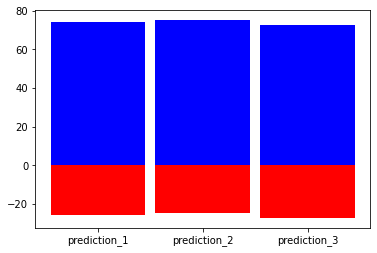

In [57]:
x=['prediction_1','prediction_2','prediction_3']
negative_data = [m1*-1,m2*-1,m3*-1]
positive_data = [m4,m5,m6]
figure(num=None, figsize=(10,3), dpi=10, facecolor='w', edgecolor='k')
fig = plt.figure()
ax = plt.subplot(1,1,1)
ax.bar(x, negative_data, width=0.9, color='r')
ax.bar(x, positive_data, width=0.9, color='b')
plt.show()
fig.savefig("figure.png") 

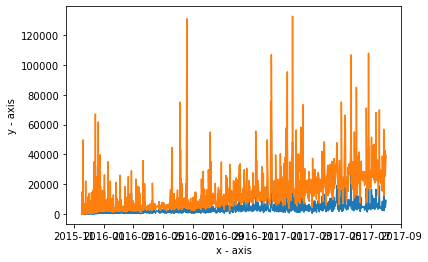

count      1971.000000
mean       8949.106545
std       12267.799790
min          81.000000
25%        1997.000000
50%        4147.000000
75%       11402.500000
max      132810.000000
Name: favorite_count, dtype: float64

In [60]:

x1 = twitter_archive_master['timestamp']
y1 = twitter_archive_master['retweet_count']

plt.plot(x1, y1, label = "line 1")

x2 = twitter_archive_master['timestamp']
y2 = twitter_archive_master['favorite_count']
 
plt.plot(x2, y2, label = "line 2")
plt.xlabel('x - axis')

plt.ylabel('y - axis')

plt.show()

twitter_archive_master['favorite_count'].describe()

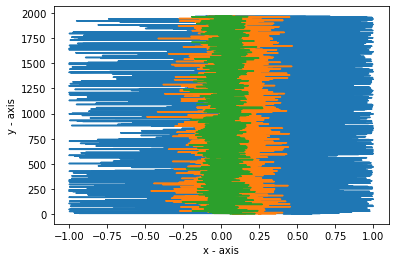

count      1971.000000
mean       8949.106545
std       12267.799790
min          81.000000
25%        1997.000000
50%        4147.000000
75%       11402.500000
max      132810.000000
Name: favorite_count, dtype: float64

In [63]:
x1 = v_df['confidence_in_P1']
y1 = range(1971 )

plt.plot(x1, y1, label = "line 1")

x2 = v_df['confidence_in_P2']
y2 = range(1971 )

plt.plot(x2, y2, label = "line 2")

x3 = v_df['confidence_in_P3']
y3 = range(1971 )

 
plt.plot(x3, y3, label = "line 3")

plt.xlabel('x - axis')

plt.ylabel('y - axis')

plt.show()

twitter_archive_master['favorite_count'].describe()

In [45]:
l_fc = []
for index, row in twitter_archive_master.iterrows():
    if row['favorite_count'] > 95000 : 
        l_fc.append(index)
l_fc

[58, 108, 309, 333, 400, 775]

In [46]:
twitter_archive_master.loc[58]

tweet_id                                                                                                      879415818425184262
timestamp                                                                                              2017-06-26 19:07:24+00:00
source                                        <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                  This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY
expanded_urls                                                    https://twitter.com/dog_rates/status/879415818425184262/video/1
rating_numerator                                                                                                              13
rating_denominator                                                                                                            10
name                                                                                             

In [47]:
twitter_archive_master.loc[108]

tweet_id                                                                                                                              866450705531457537
timestamp                                                                                                                      2017-05-22 00:28:40+00:00
source                                                                <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                  This is Jamesy. He gives a kiss to every other pupper he sees on his walk. 13/10 such passion, much tender https://t.co/wk7TfysWHr
expanded_urls                                                                            https://twitter.com/dog_rates/status/866450705531457537/photo/1
rating_numerator                                                                                                                                      13
rating_denominator                                                                

In [48]:
twitter_archive_master.loc[309]

tweet_id                                                                                                           822872901745569793
timestamp                                                                                                   2017-01-21 18:26:02+00:00
source                                             <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                  Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10 https://t.co/nTz3FtorBc
expanded_urls                                                         https://twitter.com/dog_rates/status/822872901745569793/photo/1
rating_numerator                                                                                                                   13
rating_denominator                                                                                                                 10
name                                                          

In [49]:
twitter_archive_master.loc[333]

tweet_id                                                                                                       819004803107983360
timestamp                                                                                               2017-01-11 02:15:36+00:00
source                                         <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                  This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1
expanded_urls                                                     https://twitter.com/dog_rates/status/819004803107983360/photo/1
rating_numerator                                                                                                               14
rating_denominator                                                                                                             10
name                                                                                      

In [50]:
twitter_archive_master.loc[400]

tweet_id                                                                                 807106840509214720
timestamp                                                                         2016-12-09 06:17:20+00:00
source                   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                  This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d
expanded_urls                               https://twitter.com/dog_rates/status/807106840509214720/video/1
rating_numerator                                                                                         13
rating_denominator                                                                                       10
name                                                                                                Stephan
retweet_count                                                                                         56625
favorite_count              

In [51]:
twitter_archive_master.loc[775]

tweet_id                                                                                                               744234799360020481
timestamp                                                                                                       2016-06-18 18:26:18+00:00
source                                                 <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>
text                  Here's a doggo realizing you can stand in a pool. 13/10 enlightened af (vid by Tina Conrad) https://t.co/7wE9LTEXC4
expanded_urls                                                             https://twitter.com/dog_rates/status/744234799360020481/video/1
rating_numerator                                                                                                                       13
rating_denominator                                                                                                                     10
name                              

In [52]:
de=twitter_archive_master['rating_denominator']
nu=twitter_archive_master['rating_numerator']
rt = nu/de
print(rt.value_counts())
rt.describe()

1.200000      451
1.000000      419
1.100000      397
1.300000      253
0.900000      150
0.800000       95
0.700000       51
0.500000       34
1.400000       33
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
2.600000        1
177.600000      1
0.636364        1
0.818182        1
42.000000       1
7.500000        1
0.000000        1
2.700000        1
dtype: int64


count    1971.000000
mean        1.168369
std         4.090317
min         0.000000
25%         1.000000
50%         1.100000
75%         1.200000
max       177.600000
dtype: float64

# Insights

## 1
image prediction 2 is significantly better than image prediction 1 and 3 albeit the high confidence it had in its wromg predictions, though all are close imae predivtion 3 is clearly the worst

## 2
we rate dogs is getting more popular. given the deviation in number of favs is higher than the mean value those spikes in favs require further analysis 

## 3
the spikes in the likes mostly correspond to smaller sized dogs

## 4
the rating ratios tend to have values higher than 1 indicating frequent visits from dog lovers